このノートは RECRUIT MARKETING PARTNERS Advent Calndar 2017の記事のコードを記載したものです。

In [98]:
from sympy import *
init_printing()

# 平成29年度センター試験　数学I・数学A 第１問 [1] を解く

## 与えられた式

In [99]:
x = Symbol('x')

In [100]:
f = x**2 + 4/x**2

## 求める式1

In [101]:
g = (x + 2/x)**2

`g` を `f` で除算し、 `f` の値を代入することで `g` を求める。

In [102]:
div(g, f)

In [103]:
q,r = div(g,f)

In [104]:
h = q * f + r

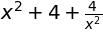

In [105]:
h

`h` と `g` が一致していることの確認。

In [106]:
g.expand() == h

True

In [107]:
h.subs({f:9})  # 答え　アイ

## 求める式2

In [108]:
p = x**3 + 8/x**3

In [109]:
q = x + 2/x

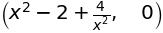

In [110]:
div(p,q)

よって、ウ=2。そして、pの値は以下に求まる。

In [111]:
p = sqrt(13) * (9 -2)  # p = (x+2/x) * (x**2 + 4/x**2 -2)

In [112]:
p # 答え　エオカ

# 類似問題を生成する

In [113]:
x = Symbol('x')

In [114]:
a, b = symbols('a, b')

In [115]:
given_expr = x**2 + a**2 / x**2  # 与えられる式 = b

In [116]:
ans_expr_1 = (x + a /x)**2  #1つ目の答えとして求める式

In [117]:
div(ans_expr_1, given_expr)

In [118]:
ans_1 = b + 2*a  # 2つ目の答え

値を代入して確認してみる。

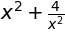

In [119]:
given_expr.subs({a:2})

In [120]:
ans_expr_1.subs({a:2})

In [121]:
ans_1.subs({a:2, b:9})

となって、元の問題が生成できている。

同様に2つ目の式も生成する。

In [122]:
c = Symbol('c')

In [123]:
p = (x + a/x)*(x**2 + a**2/x**2 -c)

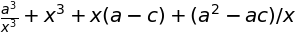

In [124]:
collect(p.expand(), x)

これが、`x^3 + a^3/x^3` になって欲しいので、`a=c`であることがわかる。

In [125]:
ans_expr_2 = sqrt(ans_1) * (b -a)

値を代入して確認する。

In [126]:
ans_expr_2.subs({a:2, b:9, ans_1:13})

## 問題生成コードを関数にまとめる

In [138]:
from random import randint, choice

def generate_problem():
    x = Symbol('x')
    a,b = symbols('a,b')

    a_var_list = range(1,6)
    b_var_list = range(6,20)
    a_var = choice(a_var_list)
    b_var = choice(b_var_list)
    expr = x + a/x
    given_expr = x**2 + a**2 / x**2
    ans_expr_1 = expr**2
    ans_1 = b + 2*a
    expr_var = sqrt(ans_1).subs({a:a_var, b:b_var})
    ans_expr_2 = expr * (b - a)
    print('生成したa: ' + str(a_var))
    print('生成したb: ' + str(b_var))
    print('与えられた式: ' + str(expand(given_expr).subs({a:a_var})))
    print('与えられた式の値: ' + str(b.subs({b:b_var})))
    print('求める式1: ' + str(ans_expr_1.subs({a:a_var})))
    print('答えアイ: ' + str(ans_1.subs({a:a_var, b:b_var})))
    print('求める式2: ' + str(expand(ans_expr_2).subs({a:a_var})))
    print('答えウ: ' + str(a.subs({a:a_var})))
    print('答えエオカ: ' + str(ans_expr_2.subs({a:a_var, b:b_var, expr:expr_var})))

In [142]:
generate_problem()

生成したa: 3
生成したb: 18
与えられた式: x**2 + 9/x**2
与えられた式の値: 18
求める式1: (x + 3/x)**2
答えアイ: 24
求める式2: b*x + 3*b/x - 3*x - 9/x
答えウ: 3
答えエオカ: 30*sqrt(6)
